<a href="https://colab.research.google.com/github/ptleskin/Goat-Grazing-Problem/blob/main/GoatGrazingProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations and imports

In [1]:
!pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt

# The Goat Grazing Problem

The Goat grazing problem [[1]](https://link.springer.com/article/10.1007/s00283-020-09966-0)[[2]](https://en.wikipedia.org/wiki/Goat_grazing_problem)[[3]](https://www.youtube.com/watch?v=ZdQFN2XKeKI) is a problem in recreational mathematics and an interesting example how a seemingly simple geometric problem can turn out to be much more complicated.


<img height='250' src='https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs00283-020-09966-0/MediaObjects/283_2020_9966_Fig2_HTML.png'>

The interior goat problem. A goat is tethered to the boundary of a circular field of radius $r$. How long must the length $R$ of the rope be chosen such that the goat can graze exactly half the field? [[Source]](https://link.springer.com/article/10.1007/s00283-020-09966-0)

The solution provided in this Colab completely concentrates on the so called *interior grazing problem*, e.g. the goat is inside the circle.

## Numeric integration

First, lets calculate the decimal approximation for $r$ using the following formula [[1](https://en.wikipedia.org/wiki/Goat_grazing_problem#Closed-form_solution)]:


$r = 2 \cos{ \left(\cfrac{\oint\limits_{C} {\cfrac{z}{2 \sin(z)- 2 z \cos(z) - \pi}} dz}{\oint\limits_{C} {\cfrac{2}{2 \sin(z)- 2 z \cos(z) - \pi}} dz}\right)} \text{, where } C \text{ is the circle } \biggl\lvert z - \cfrac{3 \pi}{4} \biggr\rvert = \cfrac{\pi}{4}$



In [2]:
# radius of the circle in complex plane
r = 1/4*np.pi

# center of that circle
p = 3/4*np.pi + 0j

# path along the circle
C = p + r*np.exp(1j*np.linspace(0, 2*np.pi, 50))

In [3]:
# Integrands in the formula above:

# nominator
I_1 = C/(2*np.sin(C)-2*C*np.cos(C)-np.pi)

# denominator
I_2 = 2/(2*np.sin(C)-2*C*np.cos(C)-np.pi)

Value $r = 1.1587284730181215178$ is given here [[2]](https://oeis.org/A133731)

In [4]:
half_area_radius_integrated = np.real(2*np.cos(np.trapz(I_1, x=C)/np.trapz(I_2, x=C)))
half_area_radius_integrated

1.1587284730181215

## Approximate the solution by Monte Carlo simulation

In [5]:
def samplePointsInsideHypersphere(nsamples : int,
                                  dims : int = 2) -> list[float]:
  '''Generate a max of 'nsamples' coordinate point inside a circle/sphere/hypersphere of dimension 'dims'
  Naive approach: generate points inside a square/cube/hypercube
  and filter out the points outside the corresponding (hyper)sphere
  '''
  arr = np.random.uniform(-1.0,1.0,[nsamples, dims])
  return arr[np.linalg.norm(arr, axis = 1)<1.0]

def approximateRadius(nsamples : int = 10000,
                      dims : int = 2,
                      pivot : list[float] = np.array([1., 0.])) -> float:
  '''Approximate radius by generating points inside a unit circle/(hyper)sphere
  and return the median distance to the pivot point
  '''
  arr = samplePointsInsideHypersphere(nsamples = nsamples,
                                      dims = dims)
  distances = np.linalg.norm(arr-pivot, axis = 1)
  return np.median(distances)


In [6]:
# Distances to point 'pivot'
# run Monte Carlo process 1000 times, and return the average
pivot : list[float] = np.array([1., 0.])

samples = [approximateRadius() for _ in range(1_000)]
half_area_radius = np.mean(samples)
print(f'''  Monte Carlo: {half_area_radius:.9f}
  Numeric integration: {half_area_radius_integrated:.9f}
  Error rate {half_area_radius/half_area_radius_integrated-1.0:.6%}''')

  Monte Carlo: 1.158880490
  Numeric integration: 1.158728473
  Error rate 0.013119%


## Plot the result

In [7]:
XY = samplePointsInsideHypersphere(nsamples = 10000, dims = 2)
T = np.linalg.norm(XY - pivot, axis = 1) < half_area_radius

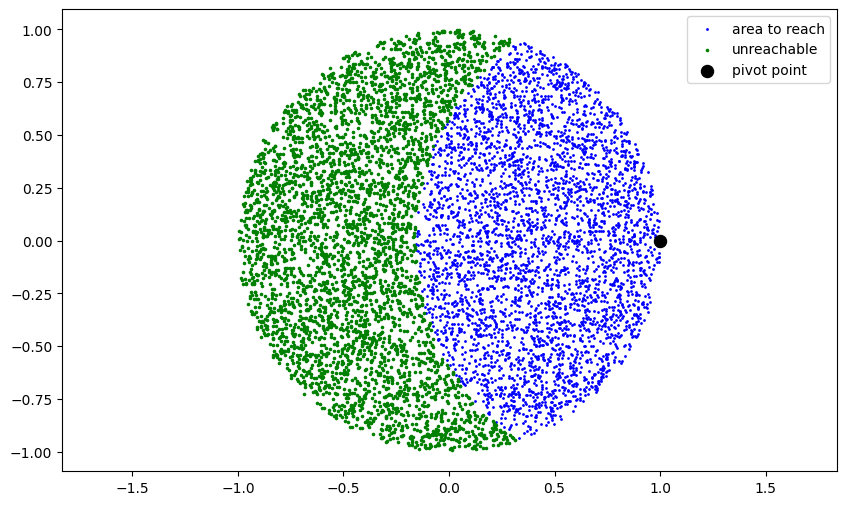

In [8]:
fig = plt.figure(figsize = [10.0, 6.0])
ax = fig.add_subplot()

X, Y = zip(*XY[T])
plt.scatter(X, Y, c = 'b', s = 1.0, label = "area to reach")

X, Y = zip(*XY[~T])
plt.scatter(X, Y, c = 'g', s = 2.5, label = "unreachable")

plt.scatter(*pivot, c = 'k', s = 75.0, label = "pivot point")

plt.axis('equal')
plt.legend()
plt.show()

## Approximate the radius for dimensions 1 to 12

In [9]:
X, Y = [], []
dimensions = list(range(1, 13))

for dim in dimensions:
  pivot_z = np.zeros(dim)
  pivot_z[0] = 1.0
  half_area_radius_hypersphere = np.mean([approximateRadius(nsamples = 50_000, dims = dim, pivot = pivot_z) for _ in range(1000)])
  print(f'Dimensions: {dim}:\tRadius: {half_area_radius_hypersphere:.5f}')
  X.append(dim)
  Y.append(half_area_radius_hypersphere)

Dimensions: 1:	Radius: 1.00023
Dimensions: 2:	Radius: 1.15854
Dimensions: 3:	Radius: 1.22866
Dimensions: 4:	Radius: 1.26812
Dimensions: 5:	Radius: 1.29379
Dimensions: 6:	Radius: 1.31141
Dimensions: 7:	Radius: 1.32485
Dimensions: 8:	Radius: 1.33481
Dimensions: 9:	Radius: 1.34227
Dimensions: 10:	Radius: 1.34997
Dimensions: 11:	Radius: 1.35451
Dimensions: 12:	Radius: 1.35644


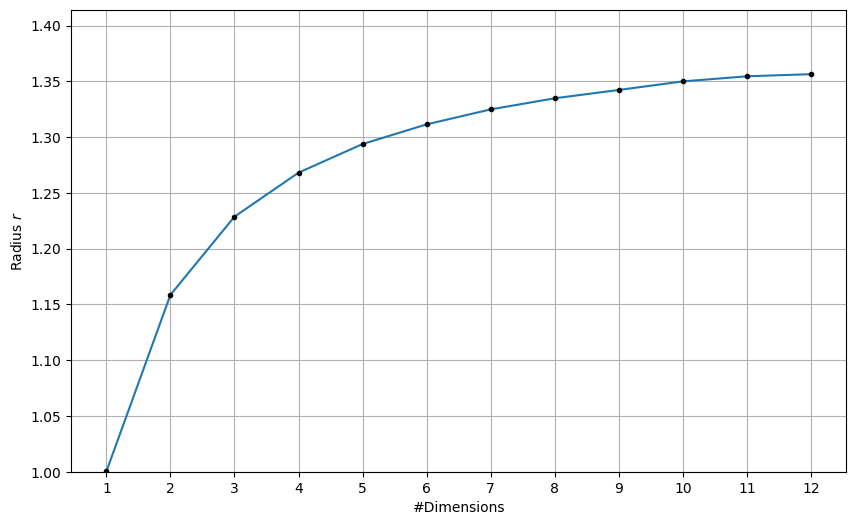

In [10]:
fig = plt.figure(figsize = [10.0, 6.0])
ax = fig.add_subplot()

plt.plot(X, Y)
plt.plot(X, Y, '.k')

plt.xlabel('#Dimensions')
plt.xticks(ticks = dimensions, labels = dimensions)

plt.ylim([1.0, 2.0**0.5])
plt.ylabel('Radius $r$')

plt.grid()
plt.show()

NB.: The radius of the cutting n-dimensional ball converges to $\sqrt{2} \approx 1.41421$ as the number of dimensions tends to infinity [[Source]](https://link.springer.com/article/10.1007/s00283-020-09966-0).